<a href="https://colab.research.google.com/github/D2DOnline/ML/blob/master/Jitendra_LRegression_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [26]:
data_dic = {'age':[20,25,60,30,21,45,62,55,78,34,22,18,19],
             'corona found': ['N','Y','Y','N','N','Y','Y','Y','N','N','N','N','N']}

In [57]:
df = pd.DataFrame(data_dic)
df

,age,corona found
0,20,N
1,25,Y
2,60,Y
3,30,N
4,21,N
5,45,Y
6,62,Y
7,55,Y
8,78,N
9,34,N


In [62]:
df['corona found'] = (df['corona found']).astype(str)
df['corona found']

0     N
1     Y
2     Y
3     N
4     N
5     Y
6     Y
7     Y
8     N
9     N
10    N
11    N
12    N
Name: corona found, dtype: object

In [67]:
lb = LabelEncoder()
lb.fit(df['corona found'])
df['corona found'] = lb.transform(df['corona found'])
df

,age,corona found
0,20,0
1,25,1
2,60,1
3,30,0
4,21,0
5,45,1
6,62,1
7,55,1
8,78,0
9,34,0


In [68]:
#feature_cols = df['age']
feature_cols = df.drop(columns=['corona found'])
feature_cols

,age
0,20
1,25
2,60
3,30
4,21
5,45
6,62
7,55
8,78
9,34


In [69]:
target_col = df['corona found']
target_col

0     0
1     1
2     1
3     0
4     0
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    0
Name: corona found, dtype: int64

In [86]:
X_train,X_test,y_train,y_test = train_test_split(feature_cols, target_col, test_size = 0.8)

In [87]:
logisticRegression_Model = LogisticRegression()

In [88]:
logisticRegression_Model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
predictions_on_test_data = logisticRegression_Model.predict(X_test)
predictions_on_test_data

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [90]:
prediction_probability = logisticRegression_Model.predict_proba(X_test)

In [91]:
prediction_probability

array([[1.95356417e-02, 9.80464358e-01],
       [9.90528851e-01, 9.47114897e-03],
       [7.72710332e-01, 2.27289668e-01],
       [9.84640099e-01, 1.53599006e-02],
       [1.87182645e-01, 8.12817355e-01],
       [7.15728453e-05, 9.99928427e-01],
       [9.00484956e-01, 9.95150442e-02],
       [3.57952003e-03, 9.96420480e-01],
       [9.92569657e-01, 7.43034294e-03],
       [9.87934334e-01, 1.20656658e-02],
       [9.68516646e-01, 3.14833544e-02]])

In [92]:
prediction_view = pd.DataFrame({'age':X_test.age,'corona found':y_test , 'corona found pred':predictions_on_test_data, 'Prediction_proba-N':prediction_probability[:,0], 'Prediction_proba-Y':prediction_probability[:,1]})

In [93]:
prediction_view

,age,corona found,corona found pred,Prediction_proba-N,Prediction_proba-Y
7,55,1,1,0.019536,0.980464
0,20,0,0,0.990529,0.009471
9,34,0,0,0.772710,0.227290
10,22,0,0,0.984640,0.015360
5,45,1,1,0.187183,0.812817
8,78,0,1,0.000072,0.999928
3,30,0,0,0.900485,0.099515
6,62,1,1,0.003580,0.996420
12,19,0,0,0.992570,0.007430
4,21,0,0,0.987934,0.012066


In [38]:
df.loc[df['age'].isin([62,20,25])]

,age,corona found
0,20,N
1,25,Y
6,62,Y


In [94]:
conf_matrix = confusion_matrix(y_test, predictions_on_test_data, labels=np.unique(target_col)[::-1])
conf_matrix

array([[3, 1],
       [1, 6]])

In [102]:
print(pd.DataFrame({'Y':conf_matrix[:,0], 'N':conf_matrix[:,1]}, index=['Y','N']))


   Y  N
Y  3  1
N  1  6


In [ ]:
classi_report = classification_report(y_test, predictions_on_test_data, labels=np.unique(target_col)[::-1])
print(classi_report)

In [97]:
from sklearn.metrics import roc_curve
fpr,tpr,theshold = roc_curve(y_test, prediction_probability[:,1])

In [98]:
print(fpr)
print(tpr)
print(theshold)

[0.         0.14285714 0.14285714 0.42857143 0.42857143 1.        ]
[0.   0.   0.75 0.75 1.   1.  ]
[1.99992843 0.99992843 0.81281736 0.09951504 0.03148335 0.00743034]


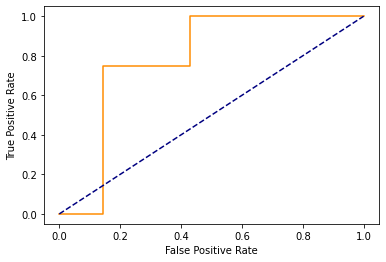

In [101]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()